<a href="https://colab.research.google.com/github/Aadityasindhuu/Aadityasindhuu/blob/main/12th_dl_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Upload your dataset file to Google Colab
from google.colab import files
uploaded = files.upload()

Saving picture12.jpg.png to picture12.jpg.png


In [3]:
# Upload your dataset file to Google Colab
from google.colab import files
uploaded = files.upload()

Saving mm.jpg.png to mm.jpg.png


In [4]:
# Load images (example)
image_paths = [ "picture12.jpg.png", "mm.jpg.png"]  # Paths to image files
images = [tf.keras.utils.load_img(path, color_mode='grayscale', target_size=(256, 256)) for path in image_paths]

# Convert images to numpy arrays and normalize pixel values
images_np = np.array([tf.keras.preprocessing.image.img_to_array(img) / 255.0 for img in images])

In [5]:
# Define the autoencoder architecture
input_img = Input(shape=(256, 256, 1))  # Assuming grayscale images

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(images_np, images_np, epochs=50, batch_size=1)


Epoch 1/50
2/2 [==============================] - 1s 201ms/step - loss: 0.6883
Epoch 2/50
2/2 [==============================] - 0s 202ms/step - loss: 0.6860
Epoch 3/50
2/2 [==============================] - 0s 196ms/step - loss: 0.6852
Epoch 4/50
2/2 [==============================] - 0s 194ms/step - loss: 0.6840
Epoch 5/50
2/2 [==============================] - 0s 199ms/step - loss: 0.6808
Epoch 6/50
2/2 [==============================] - 0s 251ms/step - loss: 0.6804
Epoch 7/50
2/2 [==============================] - 1s 366ms/step - loss: 0.6779
Epoch 8/50
2/2 [==============================] - 1s 319ms/step - loss: 0.6755
Epoch 9/50
2/2 [==============================] - 1s 280ms/step - loss: 0.6731
Epoch 10/50
2/2 [==============================] - 1s 327ms/step - loss: 0.6711
Epoch 11/50
2/2 [==============================] - 1s 232ms/step - loss: 0.6687
Epoch 12/50
2/2 [==============================] - 0s 193ms/step - loss: 0.6647
Epoch 13/50
2/2 [==============================] 

1/1 [==============================] - 1s 570ms/step


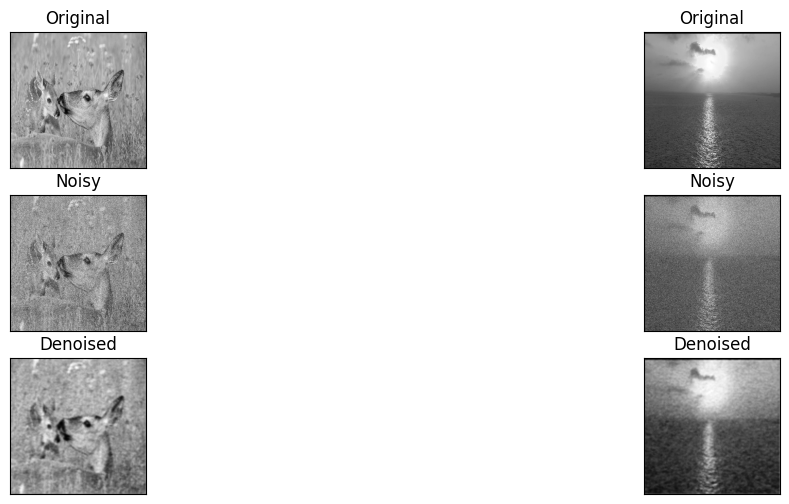

In [6]:
# Add noise to images (example: Gaussian noise)
noisy_images = images_np + np.random.normal(loc=0.0, scale=0.1, size=images_np.shape)

# Generate denoised images using the trained autoencoder
denoised_images = autoencoder.predict(noisy_images)

# Show original images, noisy images, and reconstructed images
n = len(images)
plt.figure(figsize=(15, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(images_np[i].reshape(256, 256), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Original')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_images[i].reshape(256, 256), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Noisy')

    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_images[i].reshape(256, 256), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Denoised')
plt.show()
